# Downloading and Prepping Data:

In [129]:
import numpy as np
import pandas as pd

In [130]:
# install xlrd
!pip install xlrd

print('xlrd installed!')

xlrd installed!


In [131]:
# df_can = pd.read_excel('http://s3.hothienlac.com/yomitoon/Canada.xlsx',
#                        sheet_name='Canada by Citizenship',
#                        skiprows=range(20),
#                       )
# print('Data downloaded and read into a dataframe!')

In [132]:
import cv2
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
# Đọc dữ liệu từ file CSV:
df_can = pd.read_excel('/content/drive/MyDrive/NĂM 3_2302220_ĐẠI HỌC TÂN TẠO/SPRING 2026_Năm 3_ĐH Tân Tạo/CS441V_Data Visualization_Thầy Hà/Data/Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                      )
# # Tải dữ liệu từ URL
# url = "_______"
# df = pd.read_csv(url)

In [134]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


In [135]:
df_can.shape

(197, 43)

#### 1. Clean up the dataset to remove columns that are not informative

In [136]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True) # Remove column
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### 2. Rename some of the columns so that they make sense.

In [137]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
print(df_can.head())

          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...     0     0     1     0     0     0     0   
4     0     0     0     0  ...     0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   60

#### 3. For consistency, ensure that all column labels of type string.

In [138]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)
#check data type
df_can.dtypes


,0
Country,object
Continent,object
Region,object
DevName,object
1980,int64
1981,int64
1982,int64
1983,int64
1984,int64
1985,int64


In [139]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)
df_can.dtypes

,0
Country,object
Continent,object
Region,object
DevName,object
1980,int64
1981,int64
1982,int64
1983,int64
1984,int64
1985,int64


In [140]:
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [141]:
df_can.columns = list(map(str, df_can.columns))
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [142]:
years_int = list(range(1980, 2014)) # list years, type = int
years_str = list(map(str, years_int)) # Convert int to str
print(years_int)
print("=" * 1000)
print(years_str)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [143]:
df_can[years_str].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [144]:
# Add total column
df_can['Total'] = df_can[years_str].sum(axis=1)
print(df_can)

               Continent           Region             DevName    1980    1981  \
Country                                                                         
Afghanistan         Asia    Southern Asia  Developing regions      16      39   
Albania           Europe  Southern Europe   Developed regions       1       0   
Algeria           Africa  Northern Africa  Developing regions      80      67   
American Samoa   Oceania        Polynesia  Developing regions       0       1   
Andorra           Europe  Southern Europe   Developed regions       0       0   
...                  ...              ...                 ...     ...     ...   
Yemen               Asia     Western Asia  Developing regions       1       2   
Zambia            Africa   Eastern Africa  Developing regions      11      17   
Zimbabwe          Africa   Eastern Africa  Developing regions      72     114   
Unknown            World            World               World   44000   18078   
Total              World    

In [145]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)


True

In [146]:
# Clean non country row
drop_row = ['Total', 'Unknown']
df_can.drop(drop_row, axis=0, inplace=True)
print(df_can)

               Continent              Region             DevName  1980  1981  \
Country                                                                        
Afghanistan         Asia       Southern Asia  Developing regions    16    39   
Albania           Europe     Southern Europe   Developed regions     1     0   
Algeria           Africa     Northern Africa  Developing regions    80    67   
American Samoa   Oceania           Polynesia  Developing regions     0     1   
Andorra           Europe     Southern Europe   Developed regions     0     0   
...                  ...                 ...                 ...   ...   ...   
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Af

In [147]:
# finally, let's create a list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [148]:
df_can[years].sum(axis=1)

,0
Country,
Afghanistan,58639
Albania,15699
Algeria,69439
American Samoa,6
Andorra,15
...,...
Viet Nam,97146
Western Sahara,2
Yemen,2985


In [149]:
df_can['Total'] = df_can[years].sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [150]:
continent_list = df_can.groupby('Continent').sum()
continent_list

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,PolynesiaAustralia and New ZealandMelanesiaMic...,Developing regionsDeveloped regionsDeveloping ...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [151]:
# continent_list = df_can.groupby('Continent').sum()['Total']           # Series
# continent_list

In [152]:
df_continent = df_can.groupby('Continent').sum()[['Total']]           # Dataframe
df_continent

,Total
Continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


array([<Axes: ylabel='Total'>], dtype=object)

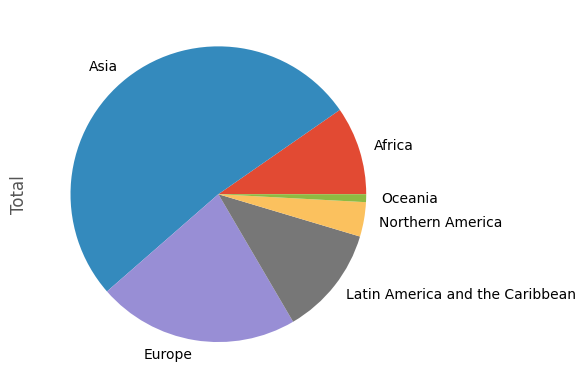

In [153]:
df_continent['Total'].plot(kind='pie', subplots= True)

In [154]:
df_continent = df_can.groupby('Continent').sum()
df_continent

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,PolynesiaAustralia and New ZealandMelanesiaMic...,Developing regionsDeveloped regionsDeveloping ...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


<Axes: ylabel='2013'>

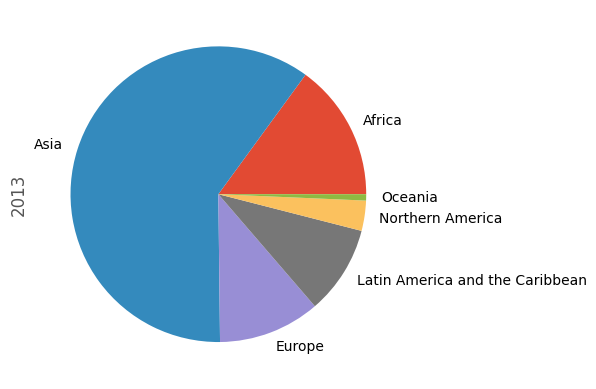

In [155]:
df_continent['2013'].plot(kind='pie')

array([<Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
       <Axes: ylabel='2012'>, <Axes: ylabel='2013'>], dtype=object)

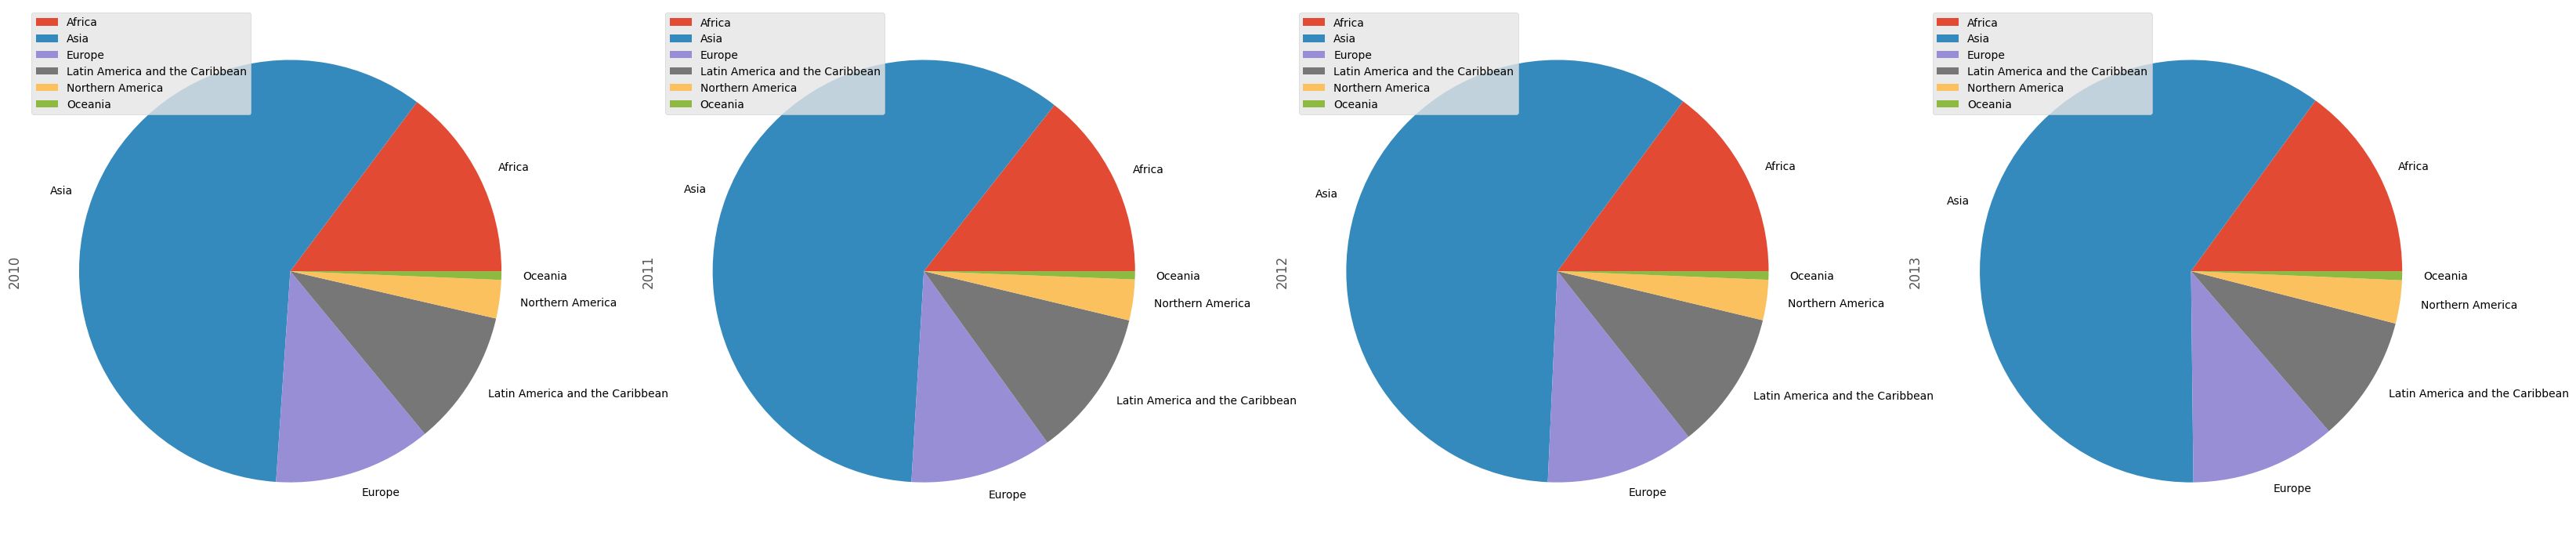

In [156]:
df_continent[list(map(str, range(2010, 2014)))].plot(kind='pie', subplots=True, figsize=(40, 20))

# Visualizing Data using Matplotlib:

In [157]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.10.0
